<a href="https://colab.research.google.com/github/fabrito2006/Laboratorio-16-MID/blob/main/Laboratorio_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 16 Calificado - Miner√≠a de Datos
#- Torres Alvarado, Fabricio Ismael

## 1. Tomando la informaci√≥n disponible en el repositorio UCI Machine Learning https://archive.ics.uci.edu/ml/datasets/Adult, uniendo los archivos ‚Äòadult.data‚Äô y ‚Äòadult.test‚Äô, cuya variable de clasificaci√≥n tiene las categor√≠as ‚Äò>50K‚Äô y ‚Äò<=50K‚Äô, haga lo siguiente:

### a. Realice el preprocesamiento de la informaci√≥n que incluya la correcci√≥n de errores, la imputaci√≥n de datos faltantes, tratamiento de outliers a nivel univariado y multivariado, transformaci√≥n de variables y an√°lisis de correlaci√≥n entras las variables predictoras.

In [50]:
!pip install ucimlrepo

In [51]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# Concat data
data = pd.concat([X, y], axis=1)

In [52]:
data.head(10)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K  
5             0             0              40  United-States  <=50K  
6             0             0              16        Jamaica  <=50K  
7             0             0              45  United-States   >50K  
8         14084             0              50  United-States   >50K  
9          5178             0              40  United-States   >50K

In [53]:
# Visualizamos los valores nulos
columnas_nulas = data.columns[data.isnull().any()]
print(columnas_nulas)
data.isnull().sum()

Index(['workclass', 'occupation', 'native-country'], dtype='object')


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [54]:
# Identificar columnas categ√≥ricas con valores nulos
columnas_nulas_cat = [col for col in data.select_dtypes(include='object').columns if data[col].isnull().sum() > 0]
print("Columnas categ√≥ricas con nulos:", columnas_nulas_cat)

# Funci√≥n para rellenar columnas categ√≥ricas con la moda
def rellenar_nulos_con_moda(data, columnas):
    for columna in columnas:
        if data[columna].isnull().sum() > 0:
            moda = data[columna].mode()[0]
            data[columna] = data[columna].fillna(moda)
            print(f"Se ha rellenado la columna '{columna}' con la moda: '{moda}'")
    return data

# Aplicar la funci√≥n si hay columnas con nulos categ√≥ricos
if columnas_nulas_cat:
    data = rellenar_nulos_con_moda(data, columnas_nulas_cat)
else:
    print("No se encontraron columnas categ√≥ricas con nulos.")

Columnas categ√≥ricas con nulos: ['workclass', 'occupation', 'native-country']
Se ha rellenado la columna 'workclass' con la moda: 'Private'
Se ha rellenado la columna 'occupation' con la moda: 'Prof-specialty'
Se ha rellenado la columna 'native-country' con la moda: 'United-States'


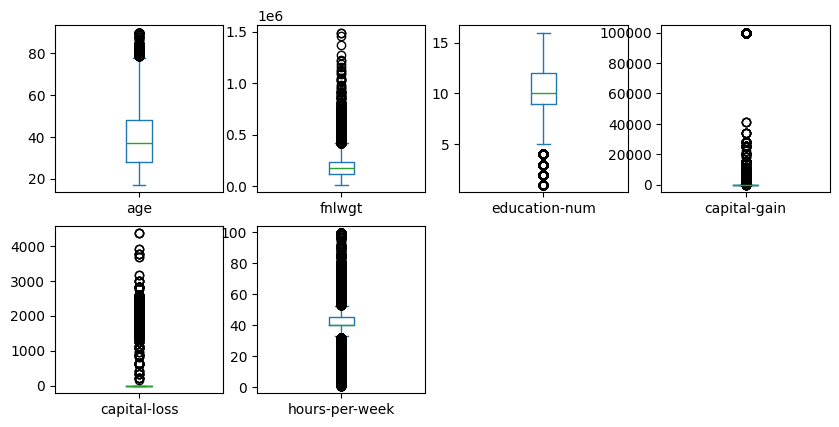

In [55]:
# Visualizamos los outliers
import matplotlib.pyplot as plt
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,10))
plt.show()

In [56]:
# Funcion para hallar los outliers
def cap_outliers_iqr(data, var):
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    data[var] = data[var].apply(lambda x: lim_sup if x > lim_sup else (lim_inf if x < lim_inf else x))
    return data

In [57]:
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in columnas_numericas:
    data = cap_outliers_iqr(data, col)
    print(f"Outliers tratados en: {col}")

Outliers tratados en: age
Outliers tratados en: fnlwgt
Outliers tratados en: education-num
Outliers tratados en: capital-gain
Outliers tratados en: capital-loss
Outliers tratados en: hours-per-week


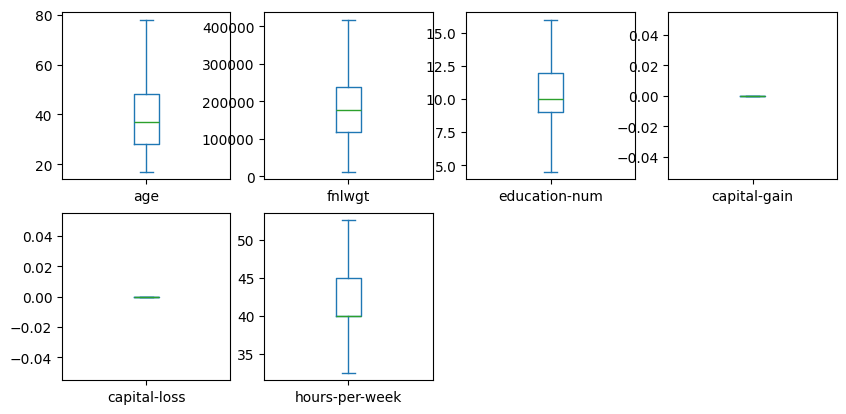

In [58]:
# Visualizamos los outliers
import matplotlib.pyplot as plt
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,10))
plt.show()

### b. Calcule el information value (IV) y seleccione las mejores variables, adem√°s, aplique un escalamiento a las variables num√©ricas y convierta las variables categ√≥ricas a dummies. Separe los datos en entrenamiento (80%) y prueba (20%) y realice un balanceo de clases.

In [59]:
# 4. Limpiar income y convertir a binaria (0 para <=50K, 1 para >50K)
data['income'] = data['income'].str.strip().str.replace('.', '', regex=False)
data['income'] = data['income'].replace({'<=50K': 0, '>50K': 1})

# 5. Identificar columnas num√©ricas y categ√≥ricas
columnas_numericas = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
columnas_categoricas = [col for col in data.columns if data[col].dtype == 'object' and col != 'income']

# 6. Escalar variables num√©ricas
scaler = StandardScaler()
data[columnas_numericas] = scaler.fit_transform(data[columnas_numericas])

# 7. Convertir variables categ√≥ricas a dummies
data = pd.get_dummies(data, columns=columnas_categoricas, drop_first=True)

# 8. Separar X e y
X = data.drop('income', axis=1)
y = data['income']

# 9. Separar en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Balanceo de clases (sobremuestreo)
train_data = pd.concat([X_train, y_train], axis=1)
mayor = train_data[train_data['income'] == 0]
minor = train_data[train_data['income'] == 1]

print("Distribuci√≥n original en y_train:")
print(y_train.value_counts())

# Aplicar balanceo si hay registros de la clase 1
if len(minor) > 0:
    minor_upsampled = resample(minor, replace=True, n_samples=len(mayor), random_state=42)
    train_balanceado = pd.concat([mayor, minor_upsampled])

    # Actualizar X_train e y_train
    X_train = train_balanceado.drop('income', axis=1)
    y_train = train_balanceado['income']

    print("\nBalanceo realizado correctamente.")
    print("Distribuci√≥n balanceada en y_train:")
    print(y_train.value_counts())
else:
    print("‚ö†Ô∏è No se encontraron registros de la clase 1 para balancear.")

Distribuci√≥n original en y_train:
income
0    29741
1     9332
Name: count, dtype: int64

Balanceo realizado correctamente.
Distribuci√≥n balanceada en y_train:
income
0    29741
1    29741
Name: count, dtype: int64


### c. Entrene los modelos k-NN, SVM, regresi√≥n log√≠stica, √°rbol de clasificaci√≥n y Random Forest utilizando hiperpar√°metros est√°ndar, b√∫squeda en cuadr√≠cula y b√∫squeda aleatoria para poder encontrar el modelo de clasificaci√≥n con mejor desempe√±o. Luego, obtenga el mejor accuracy junto con los hiperpar√°metros √≥ptimos para dicho modelo.

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1. Modelos r√°pidos con pocos hiperpar√°metros
modelos = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5],
            'weights': ['uniform']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=500),
        'params': {
            'C': [0.1, 1],
            'solver': ['liblinear']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [5, None],
            'criterion': ['gini']
        }
    }
}

# 2. Entrenar con RandomizedSearchCV r√°pido
mejores_modelos = []
for nombre, dic in modelos.items():
    print(f"\nüîç Entrenando modelo: {nombre}")
    search = RandomizedSearchCV(
        dic['model'],
        dic['params'],
        n_iter=2,
        cv=2,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    search.fit(X_train, y_train)
    y_pred = search.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"‚úÖ Accuracy: {acc:.4f}")
    print(f"üìå Mejores par√°metros: {search.best_params_}")

    mejores_modelos.append({
        'nombre': nombre,
        'accuracy': acc,
        'mejores_parametros': search.best_params_,
        'modelo': search.best_estimator_
    })

# 3. Mostrar el mejor modelo
mejor = max(mejores_modelos, key=lambda x: x['accuracy'])

print("\nüèÜ Mejor modelo final:")
print(f"Modelo: {mejor['nombre']}")
print(f"Accuracy: {mejor['accuracy']:.4f}")
print(f"Hiperpar√°metros √≥ptimos: {mejor['mejores_parametros']}")


üîç Entrenando modelo: KNN
‚úÖ Accuracy: 0.7647
üìå Mejores par√°metros: {'weights': 'uniform', 'n_neighbors': 3}

üîç Entrenando modelo: LogisticRegression
‚úÖ Accuracy: 0.7861
üìå Mejores par√°metros: {'solver': 'liblinear', 'C': 0.1}

üîç Entrenando modelo: DecisionTree
‚úÖ Accuracy: 0.7794
üìå Mejores par√°metros: {'max_depth': None, 'criterion': 'gini'}

üèÜ Mejor modelo final:
Modelo: LogisticRegression
Accuracy: 0.7861
Hiperpar√°metros √≥ptimos: {'solver': 'liblinear', 'C': 0.1}
